# NeuralProphet


`NeuralProphet` is a `PyTorch` implementation of a professional-friendly time series forecasting tool based on neural networks. This is heavily influenced by `Prophet`, a popular forecasting tool developed by *Meta*. `NeuralProphet` is based on a completely modular architecture that allows it to grow in the future as new components are added.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet
import pickle

In [10]:
#Read data
df = pd.read_csv(r'C:\Users\alede\Desktop\TERCER_PROYECTO\app_df\nike_sales_app')
#New name columns
df.rename(columns = {'Invoice Date':'ds', 'Total Sales':'y'}, inplace = True)
#we change ds column to date format
df['ds'] = pd.DatetimeIndex(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      9360 non-null   int64         
 1   ds              9360 non-null   datetime64[ns]
 2   Product         9360 non-null   object        
 3   Region          9360 non-null   object        
 4   Retailer        9360 non-null   object        
 5   Sales Method    9360 non-null   object        
 6   State           9360 non-null   object        
 7   Price per Unit  9360 non-null   int64         
 8   y               9360 non-null   int64         
 9   Units Sold      9360 non-null   int64         
 10  Month           9360 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 804.5+ KB


In [24]:

df.head(1)

,ds,y
0,2020-01-01,6000


In [14]:
df = df.drop_duplicates(subset=['ds'])

In [15]:
import neuralprophet
neuralprophet.__version__

'0.6.0'

In [16]:
#Create a model
m = NeuralProphet()
# Time units is Day
df_train, df_val = m.split_df(df, freq='D', valid_p = 0.2)
#Train the model
metrics = m.fit(df_train, freq='D', validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.586% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.483% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet w

Epoch 233: 100%|██████████| 233/233 [00:00<00:00, 1365.20it/s, loss=0.0188, v_num=2, MAE_val=1.42e+3, RMSE_val=1.85e+3, Loss_val=0.0518, RegLoss_val=0.000, MAE=1.09e+3, RMSE=1.33e+3, Loss=0.019, RegLoss=0.000]   


* This indicates that the frequency of our data is day, which is why above we have set freq='D'
* We have provided only one DF for the model, the normalization will be global. NeuralProphet will normalize the data using the entire time series instead of individual batches.
* It also warns that the number of batches is too small for automatic learning rate search.
This means that automatic learning rate search may not produce optimal results due to the limited amount of data.

In [17]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,2794.455811,3426.595459,0.175904,0.0,0,5133.982910,5870.770996,0.329334,0.0
1,2662.967529,3274.367188,0.161072,0.0,1,5059.341797,5799.820801,0.320489,0.0
2,2519.822510,3103.812744,0.145112,0.0,2,5023.356445,5751.451172,0.314206,0.0
3,2355.540039,2907.408203,0.127698,0.0,3,4798.795410,5540.059570,0.292702,0.0
4,2176.602295,2691.539062,0.109702,0.0,4,4688.036133,5433.259766,0.278724,0.0
...,...,...,...,...,...,...,...,...,...
228,1425.121216,1848.456177,0.051906,0.0,228,1074.647827,1308.225952,0.018438,0.0
229,1423.499878,1847.074707,0.051829,0.0,229,1082.493042,1310.361084,0.018609,0.0
230,1423.691040,1847.244263,0.051838,0.0,230,1083.714722,1310.747070,0.018455,0.0
231,1423.720459,1847.269531,0.051840,0.0,231,1064.713623,1283.939697,0.018244,0.0


*Drop colum epoch*

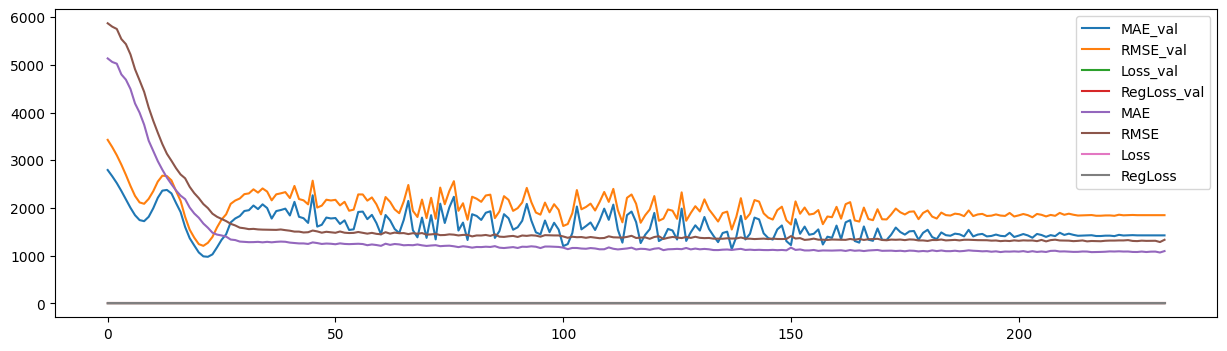

In [18]:
metrics.drop(['epoch'], axis=1).plot(figsize=(15,4));

The recommendation to remove the "epoch" column is generally because this column does not provide useful information for viewing model metrics.

The "epoch" column simply lists the number of epochs or iterations during model training

In [31]:
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.099% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.599% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.599% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [20]:
forecast.head()

,ds,y,yhat1,trend,season_weekly
0,2020-01-01,6000,3580.787354,3587.286621,-6.499018
1,2020-01-02,5000,3667.001953,3600.389404,66.612457
2,2020-01-03,4000,3635.169189,3613.492432,21.676786
3,2020-01-04,3825,3644.135010,3626.595215,17.539682
4,2020-01-05,5400,3578.917969,3639.698242,-60.780354


In [21]:
forecast['residual1']= forecast['y']-forecast['yhat1']

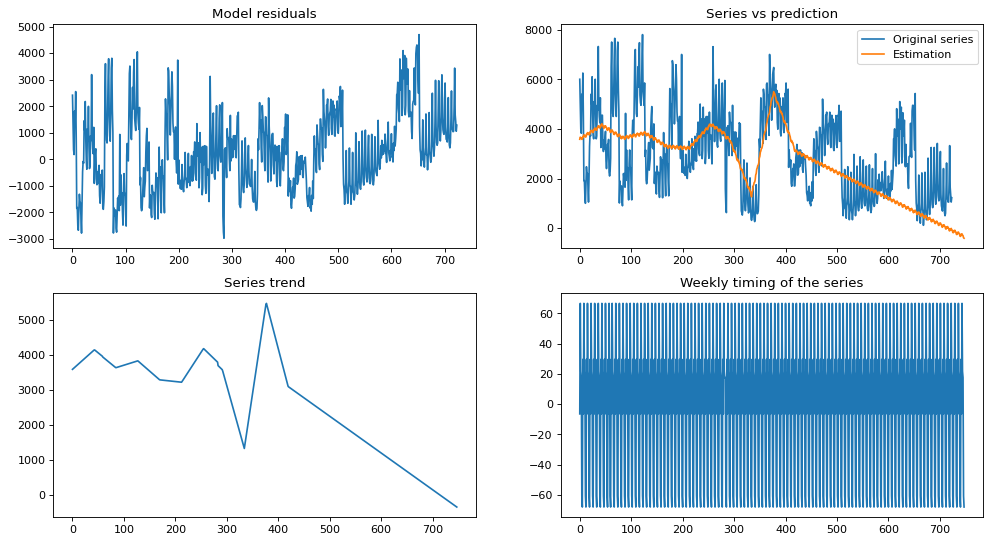

In [28]:
# Create a graph
f = plt.figure(figsize=(15, 8), dpi=80)
# First component
ax1 = f.add_subplot(221)
ax1.set_title('Model residuals')
ax1.plot(forecast['residual1'])
# Second Component 
ax2 = f.add_subplot(222)
ax2.set_title('Series vs prediction')
ax2.plot(forecast['y'])
ax2.plot(forecast['yhat1'])
ax2.legend(['Original series', 'Estimation'])
# 3° component
ax3 = f.add_subplot(223)
ax3.set_title('Series trend')
ax3.plot(forecast['trend'])
# 4° component
ax4 = f.add_subplot(224)
ax4.set_title('Weekly timing of the series')
ax4.plot(forecast['season_weekly'])

* Model residuals (Top left component):
This graph shows the model residuals, which are the differences between the observed values and the values predicted by the model.
Ideally, the residuals should appear random and be uniformly distributed around zero, which would indicate that the model is correctly capturing the underlying structure of the data.
* Series vs. Prediction (Upper Right Component):
This graph shows the original series (the observed values) and the model estimate (the predicted values) on the same graph.
By comparing the original series with the model estimates, you can visually evaluate how well the model fits the observed data.
* Series Trend (Lower Left Component):
This graph shows the estimated trend of the time series.
Trend represents the general direction or pattern of change in the data over time. By looking at the trend, you can identify patterns of growth, decline, or seasonality in the data.
* Annual temporality of the series (Lower right component):
This graph shows the component of the time series that captures the annual or seasonal variation in the data.
It can help you identify recurring or seasonal patterns in data that repeat over a one-year cycle.

In [29]:
#Save model to pkl file
with open('modelo_neuralprophet.pkl', 'wb') as file:
    pickle.dump(m, file)

In [32]:
#save df to csv
forecast.to_csv('forecast_neuralprophet.csv', index=False)

In [33]:
import os
print(os.path.exists('modelo_neuralprophet.pkl'))

True
